This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

from folium import plugins

In [2]:
house_df = pd.read_csv('/content/kc_house_data.csv', encoding = 'ISO-8859-1')

In [3]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
g1 = [go.Box(y=house_df.bedrooms,name="Bedrooms",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=house_df.bathrooms,name="Bathrooms",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
g3 = [go.Box(y=house_df.floors,name="Floors",marker=dict(color="rgba(204,0,102,0.9)"),hoverinfo="name+y")]

layout2 = go.Layout(title="Bedrooms,Bathrooms and Floors",yaxis=dict(range=[0,13])) 

fig2 = go.Figure(data=g1+g2+g3,layout=layout2)
iplot(fig2)

(0.0, 10806.400000000001)

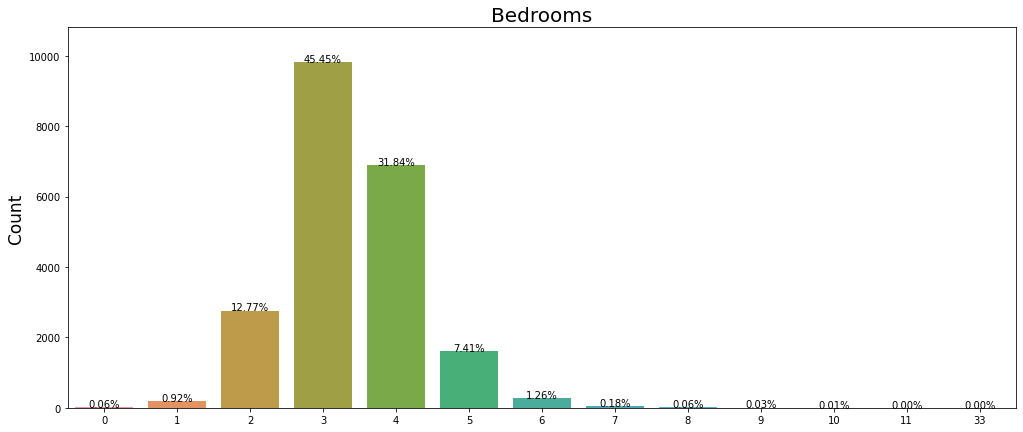

In [7]:
total = len(house_df)
ax1 = plt.figure(figsize=(17,7))

g = sns.countplot(x='bedrooms', data=house_df)
g.set_title("Bedrooms", fontsize=20)
g.set_xlabel("", fontsize=17)
g.set_ylabel("Count", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

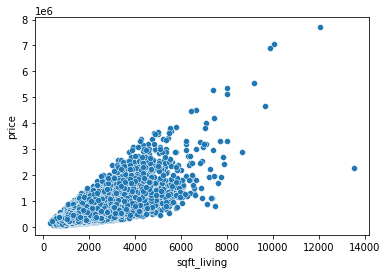

In [8]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df);

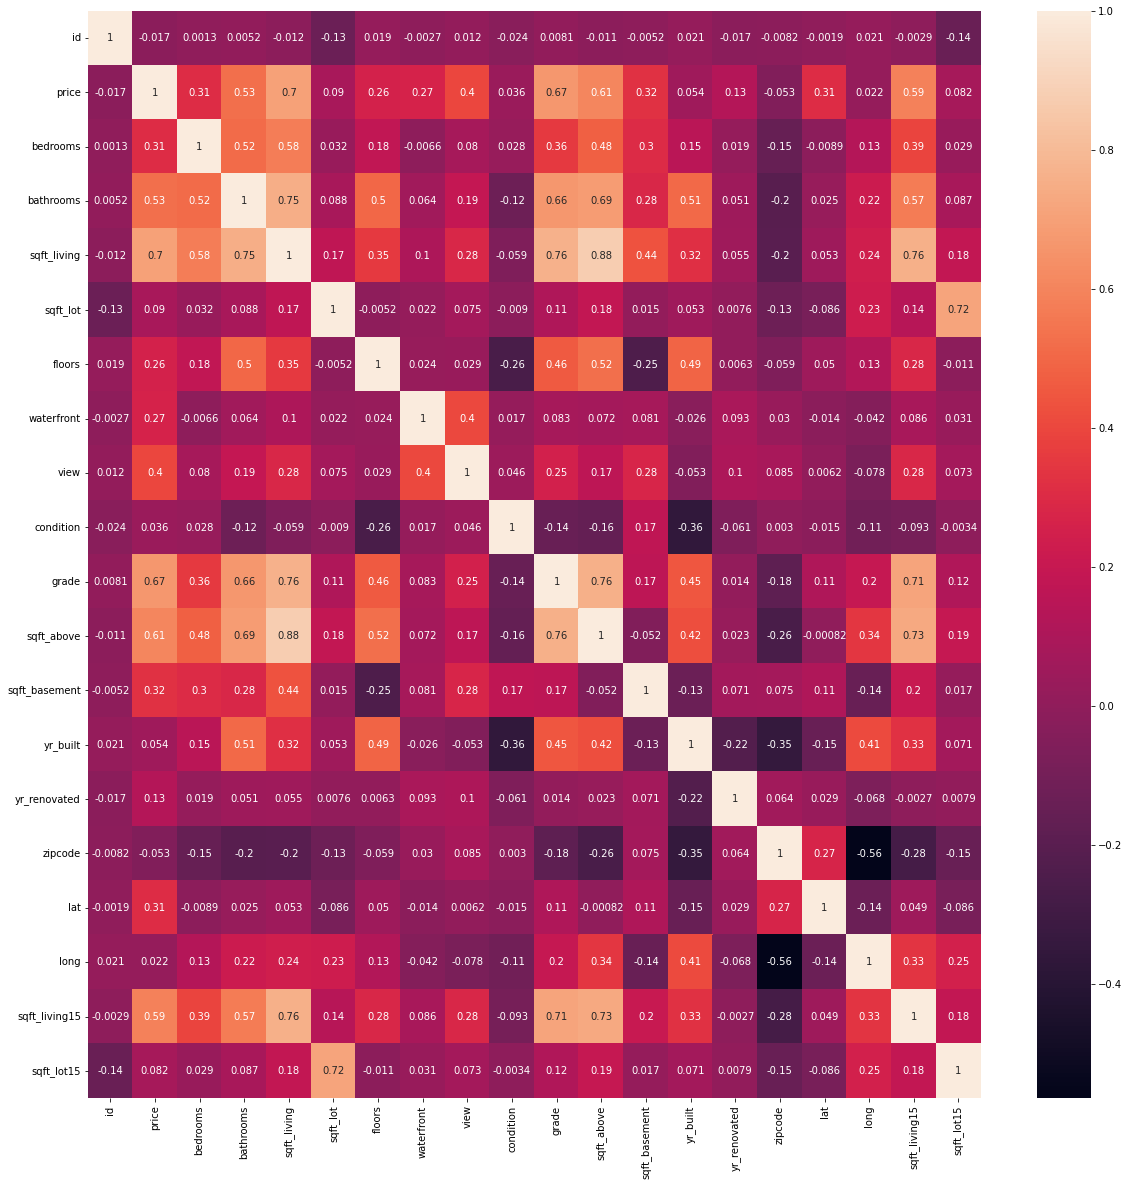

In [9]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(house_df.corr(), annot = True);

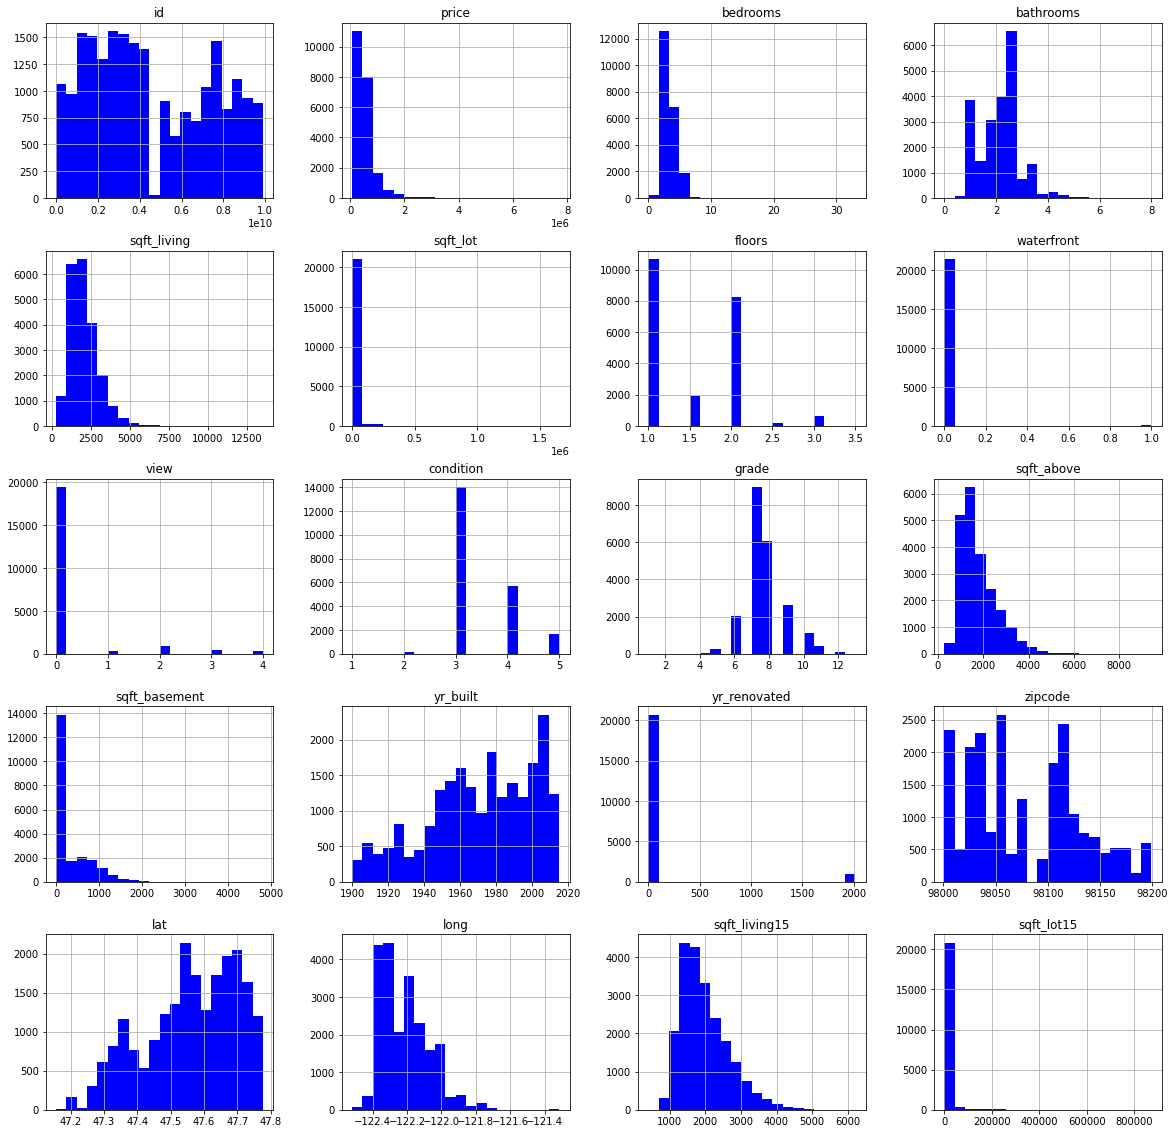

In [10]:
house_df.hist(bins = 20, figsize = (20,20), color = 'b');

In [11]:
house_df["color"] = ""
house_df.color[house_df.grade == 1] = "rgb(255,255,255)"
house_df.color[house_df.grade == 2] = "rgb(220,220,220)"
house_df.color[house_df.grade == 3] = "rgb(242, 177, 172)"
house_df.color[house_df.grade == 4] = "rgb(255,133,27)"
house_df.color[house_df.grade == 5] = "rgb(255,255,204)"
house_df.color[house_df.grade == 6] = "rgb(255,65,54)"
house_df.color[house_df.grade == 7] = "rgb(178,37,188)"
house_df.color[house_df.grade == 8] = "rgb(51,51,0)"
house_df.color[house_df.grade == 9] = "rgb(37,188,127)"
house_df.color[house_df.grade == 10] = "rgb(26,51,176)"
house_df.color[house_df.grade == 11] = "rgb(132,10,10)"
house_df.color[house_df.grade == 12] = "rgb(82,80,80)"
house_df.color[house_df.grade == 13] = "rgb(0,0,0)"

dataplus = house_df[np.logical_and(house_df.grade >= 7,house_df.yr_built >= 2000)] 
lats = list(dataplus.lat.values)
longs = list(dataplus.long.values)

mapbox_access_token = 'pk.eyJ1IjoiZGFya2NvcmUiLCJhIjoiY2pscGFheHA1MXdqdjNwbmR3c290MTZ6dCJ9.K1FMv_q3ZVlKP13RrjFkjg'
mapp = [go.Scattermapbox(lat=lats,lon=longs,mode="markers",marker=dict(size=4,color=dataplus["color"]) ,hoverinfo="text",text="Grade:"+dataplus.grade.apply(str)+" Built Year:"+dataplus.yr_built.apply(str)+" Price:"+dataplus.price.apply(str))]
layout5 = dict(title="Grade(+7) - Built Year(+2000) Map",width=800,height=750,hovermode="closest",mapbox=dict(bearing=0,pitch=0,zoom=9,center=dict(lat=47.5,lon=-122.161),accesstoken=mapbox_access_token))
fig5 = go.Figure(data=mapp,layout=layout5)
iplot(fig5);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying t

In [12]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [13]:
X = house_df[selected_features]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [14]:
y = house_df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [15]:
print(X.shape, y.shape)

(21613, 7) (21613,)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [18]:
X_scaled.shape

(21613, 7)

In [19]:
y = y.values.reshape(-1,1)

In [20]:
y.shape

(21613, 1)

In [21]:
y_scaled = scaler.fit_transform(y)

In [22]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [24]:
print(X_train.shape, X_test.shape )

(16209, 7) (5404, 7)


In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(7, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear')) 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [28]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 9.9728e-04 - val_loss: 0.0011
Epoch 10/100
260/260 [==============================] - 1s 2ms/step - loss: 9.9213e-04 

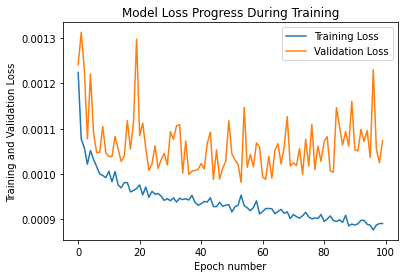

In [29]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss']);

Por volta da época 20 ele já se estabiliza, provavelmente não seria necessário treinainarmos por 100 épocas.

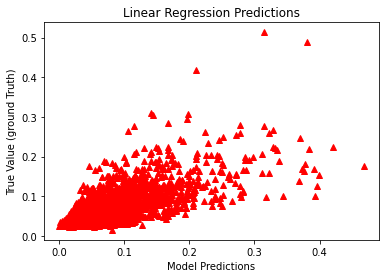

In [30]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [31]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

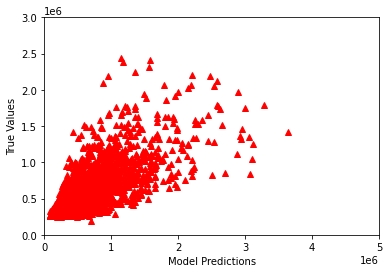

In [32]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000);

In [33]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [35]:
k

7

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 237657.94 
MSE = 56481296513.997314 
MAE = 155015.45264792282 
R2 = 0.5317701899133165 
Adjusted R2 = 0.531162775408015


Temos o valor do R2 0.53, e o valor do adj_r2 0.53, quer dizer que os atributos que selecionamos tem um boa relação com o preço, demosntra que não selecionamos atributos inúteis, caso o valor do R2 fosse muito abaixo poderíamos eliminar os atributos e realizarmos mais testes.


# **2° Teste**


Vamos adicionar mais atributos e fazer comparar os resultados.

In [39]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,1180,0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,2170,400,0,0,3,7,2170,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,770,0,0,0,3,6,770,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,1050,910,0,0,5,7,1050,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,1680,0,0,0,3,8,1680,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [42]:
y = house_df['price']

In [43]:
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(19, )))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [45]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [46]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 9.0642e-04 - val_loss: 6.1322e-04
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 4.7120e-04 - val_loss: 5.4557e-04
Epoch 3/100
260/260 [==============================] - 1s 2ms/step - loss: 4.4594e-04 - val_loss: 5.0757e-04
Epoch 4/100
260/260 [==============================] - 1s 2ms/step - loss: 3.9013e-04 - val_loss: 4.8533e-04
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 3.9402e-04 - val_loss: 4.4134e-04
Epoch 6/100
260/260 [==============================] - 1s 2ms/step - loss: 3.6149e-04 - val_loss: 3.8887e-04
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 3.4089e-04 - val_loss: 3.7722e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 3.3624e-04 - val_loss: 3.5200e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 3.1288e-04 - val_loss: 3.9354e-04
Epoch 10/100
260/26

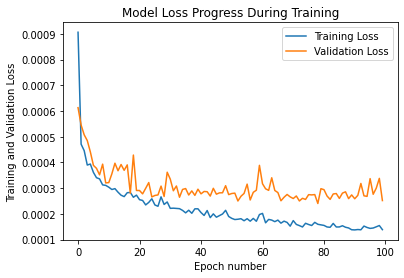

In [47]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss']);

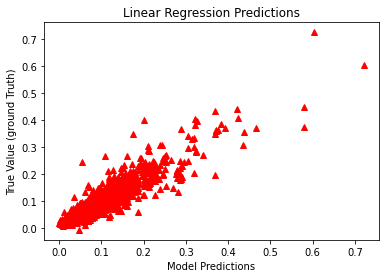

In [48]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [49]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 125462.149 
MSE = 15740750801.836863 
MAE = 71255.20225505701 
R2 = 0.8824445321364313 
Adjusted R2 = 0.8822920324561042


Neste segundo teste podemos observar que mantendo todos os atibutos não existe caracteristicas que baixem o R2 e o Adjusted R2, ao contrário ele aumentou os valores, sendo assim, chegamos a conclusão que poderiamos manter todos os atributos na prvisão.